# Examples of MNP algorithms application

In [1]:
import logging

In [2]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [5]:
from functools import partial

from core import *
from algorithm import *

# Larger instance

In [4]:
data_l = WMFileSource(
    filepath='instances/data.wm',
    mapper=int,
    gatherer=list,
)
m_l = 20

## Gurobi

In [5]:
exact_tl = 300
gurobi_l = GurobiSolver(timelimit=exact_tl).solve(data_l.get_data(), m_l)
gurobi_l


Set parameter Username
Academic license - for non-commercial use only - expires 2022-01-27
Set parameter TimeLimit to value 3
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (linux64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 235 rows, 4700 columns and 4700 nonzeros
Model fingerprint: 0x51d76d99
Model has 554600 quadratic objective terms
Variable types: 0 continuous, 4700 integer (4700 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+09, 8e+11]
  QObjective range [3e+06, 6e+11]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Found heuristic solution: objective 4.241330e+14
Presolve time: 0.09s
Presolved: 235 rows, 4700 columns, 4700 nonzeros
Presolved model has 554600 quadratic objective terms
Variable types: 0 continuous, 4700 integer (4700 binary)
Found heuristic s

Statistics for partial solution 140567837463792.
IS_FULL:True
SETS:
0: 80539 4519 4830 23181 50152 46999 50579 25811 56643 46912 52350 24611 27707 49158 25623 52164 51893 6415 13030 10360 11812 49418 25873 25408 9152 23523 5968 51914 50472 47239 7314 49526
1: 1933 53662 67749 63754 206707 16959 270015 31435 28470 11501 14485 34194 45839 68027 9948 66449 65415
2: 23256 282977 56716 23080 69933 79350 78406 81724 78134 228372 26308 29092
3: 8993 22890 20440 40264 208596 260107 37140 28756 20176 44229 84438 283620
4: 1471 38206 5999 85270 30807 4967 63483 240554 271928 20981 30137 62852 86717 22893 87100
5: 86687 57954 67680 66543 63333 49046 297393 89859 38230 71789 76620 88870
6: 60486 19311 6276 21309 74335 35133 45268 293515 34940 18793 27698 314306 44558 57889
7: 7059 1302 30247 51051 60230 254474 234039 298160 44446 71640
8: 88151 92414 45821 11015 53692 45444 33906 3606 46232 83809 201347 86551 262574
9: 89243 264621 30733 240534 210543 219218
10: 96607 94830 17355 98472 97302 10588

## Greedy Algorithm

In [8]:
greedy_l = GreedySolver().solve(data_l.get_data(), m_l)
greedy_l

Statistics for partial solution 140344293416912.
IS_FULL:True
SETS:
0: 23256 69547 30247 45444 51051 387162 89243 81049 60230 16676 201347
1: 375698 21309 89859 50152 206707 81724 18793 38229 37140 71640 65415
2: 19311 372906 49903 65893 38206 90314 38230 20440 208596 70866 82469
3: 88151 40868 1933 49046 23080 95292 1302 357826 14485 71789 34194 68027 210543
4: 80539 53662 211791 46912 55712 27698 6415 26581 99148 9948 88870 349541
5: 8993 346671 7059 56643 27707 52539 78372 27196 86760 98418 47239 219218
6: 92616 73494 34999 16959 228372 87745 40264 49418 22385 342797 66449
7: 92018 339311 30807 3606 59258 84625 234039 23523 51914 44558 78777 14191
8: 66543 35133 69933 339195 25408 9152 83809 39093 7314 49526 240534 91393
9: 57954 5979 52350 78406 28470 85270 26308 330057 10360 240554 94676 46232
10: 67680 252972 47520 11015 90727 45268 24611 327670 83002 5968 70270 30137
11: 22890 4519 67749 72297 34940 49158 13030 314306 254474 95204 87578 40391
12: 15822 50601 74335 23181 1471 637

### Karmarkar-Karp

In [9]:
kk_l = KarmarkarKarp().solve(data_l.get_data(), m=m_l)
kk_l


Statistics for partial solution 140345364188368.
IS_FULL:True
SETS:
0: 25623 40391 34940 80457 55712 311060 260107 92820 87539 50472 16676
1: 45444 72297 65415 30137 53662 293515 279671 92359 83946 22890 11501 4967
2: 45268 74335 63483 30247 297393 271928 94830 87100 51893 22385 16959
3: 46232 69547 68027 28470 372906 208596 90314 82469 49418 23523 10360 5999
4: 26308 38230 37140 79350 56643 342797 228372 92616 87745 50322 9948 6415
5: 46912 70866 66543 28215 375698 206707 89859 81724 49526 23256 11812 4830
6: 38229 38206 78777 56716 24948 339311 234039 92018 84625 52539 10588 5979
7: 26581 39175 35129 76620 60230 357826 210543 95292 88151 49903 10373 6276
8: 25873 41794 33906 80539 55124 303036 262574 98472 87268 50579 15515 1502
9: 46999 78134 59258 27707 387162 201347 89243 81049 47520 20440 17355
10: 25408 40264 34999 78406 57889 298160 270015 96607 86551 51051 11015 5968
11: 25811 40868 34194 78372 57954 289260 282977 92414 86687 50601 15822 1471
12: 45839 69933 67749 28756 327670

## Moves

In [10]:
random_greedy = RandomMover([greedy_transp_many, greedy_transp_one, max_to_min])
consequent_greedy = ConsequentMover(
    [
        partial(greedy_transp_many, max_to_transp=50),
        tabu_swap_min_max,
        partial(greedy_transp_many, max_to_transp=20),
        max_to_min,
        tabu_swap_min_max,
        partial(greedy_transp_many, max_to_transp=10),
        tabu_swap_min_max,
        tabu_swap_min_max,
    ]
)

## Simulated Annealing

In [14]:
%%time
sa_l_g = SimulatedAnnealing(
    greedy_l,
    move=consequent_greedy,
    temperature_func=temperature_div,
    t_max=10**7,
    t_min=10**-9,
    max_iter=10**4,
).solve(
    data_l,
    m_l,
)
sa_l_g


CPU times: user 2min 28s, sys: 35.9 ms, total: 2min 28s
Wall time: 2min 28s


Statistics for partial solution 140344241875024.
IS_FULL:True
SETS:
0: 60486 32633 92018 46912 53692 279671 59258 271928 75173 16676 68027
1: 375698 90727 38206 81724 208596 37140 70270 82469 71640
2: 87268 7059 35133 67749 45268 69933 327670 206707 85270 18793 39175 66449
3: 88151 40868 19311 47520 69547 357826 83002 11812 49418 1502 14485 22385 30137 210543 9948
4: 22890 97302 10588 293515 10373 95292 27698 91393 57889 349541
5: 92359 92616 23080 27707 31435 21753 240554 254474 87578 50472 7314 86717 40391
6: 49046 23181 63754 52350 20440 40264 260107 94676 44446 342797 65415
7: 34999 270015 339311 52164 35129 30247 81049 84625 51914 62852 14191
8: 94830 92820 78406 4967 298160 26581 70866 311060 78777
9: 80539 49903 98472 211791 28470 330057 78372 98418 80457
10: 372906 50152 34940 78134 5999 51893 71789 301803 88870
11: 346671 66543 6276 50579 72297 16959 41794 1302 314306 95204 44558
12: 57954 92414 252972 74335 65893 24611 339195 13030 86551 49526
13: 83946 73494 87745 33906 1036

In [13]:
%%time
sa_l_kk = SimulatedAnnealing(
    kk_l,
    move=consequent_greedy,
    temperature_func=temperature_div,
    t_max=10**7,
    t_min=10**-9,
    max_iter=10**4,
).solve(
    data_l,
    m_l,
)
sa_l_kk


CPU times: user 2min 27s, sys: 75 ms, total: 2min 27s
Wall time: 2min 27s


Statistics for partial solution 140345304431968.
IS_FULL:True
SETS:
0: 25623 40391 80457 260107 16676 51893 50322 89859 210543 10373 33906 87268 23080 44558 31435
1: 55712 311060 92820 72297 293515 76620 67680 86760
2: 271928 94830 90314 5999 57889 51051 11015 25811 47239 27698 23181 349541
3: 87539 208596 78134 387162 17355 73494 63754 91393 49046
4: 45444 65415 16959 38206 45839 28756 327670 252972 66449 63333 85270 20176
5: 49418 70866 66543 28215 375698 206707 81724 11812 4830 69933 90727
6: 38230 38229 78777 56716 24948 339311 234039 92018 52539 10588 5979 83809 1302
7: 30137 53662 11501 46912 39175 35129 60230 357826 59258 89243 20981 19311 211791 21309
8: 82469 56643 88151 41794 15515 46999 27707 34999 298160 5968 15822 1471 27196 44446 264621 4519
9: 30247 22385 69547 23523 10360 26308 23256 25873 1502 289260 39093 76385 60486 1933 71789 284536
10: 297393 46232 80539 40264 270015 96607 86551 86717 52164
11: 22890 87100 201347 47520 78406 34194 78372 86687 50601 35133 7314 29092

## Tabu Search

In [23]:
%%time
# ANNEALING
tabu_l_a = TabuSearch(
    sa_l,
    move=consequent_greedy,
    ttl=3000,
    max_iter=10**4 * 2,
).solve(
    data_l.get_data(),
    m_l,
)
tabu_la

CPU times: user 2min 16s, sys: 0 ns, total: 2min 16s
Wall time: 2min 16s


Statistics for partial solution 140658370665584.
IS_FULL:True
SETS:
0: 45444 30137 35129 303036 67749 254474 66449 83809 23080 1302 3606 53692 88870
1: 63483 30247 51893 4830 234039 87268 78134 34999 298160 22893 98418 52164
2: 11501 70866 387162 47520 24611 60486 86717 97302 14191 44558 211791
3: 34940 87539 45268 28470 66543 78777 24948 201347 89243 11015 289260 51914 14485 32633
4: 23523 60230 10373 59258 86687 15822 44446 71640 301803 47239 240534 94676
5: 375698 52539 10588 41794 98472 15515 78406 25811 50601 87578 219218
6: 72297 94830 372906 49418 228372 11812 25408 57889 13030 43489 86760
7: 80457 53662 5999 357826 25873 50579 40868 252972 90727 76385 20981
8: 55712 293515 16959 208596 9948 23256 96607 49158 97998 85270 44229 75469
9: 311060 87100 50322 6415 28215 49526 38229 57954 95204 71789 240554 20176
10: 260107 16676 10360 38230 81724 56716 49903 28756 73494 91393 349541
11: 50472 79350 5979 39175 262574 78372 92414 27196 52350 346671 21753
12: 83946 342797 92616 5968 351

In [25]:
%%time
# GREEDY
tabu_l_g = TabuSearch(
    greedy_l,
    move=consequent_greedy,
    ttl=3000,
    max_iter=10**4 * 2,
).solve(
    data_l.get_data(),
    m_l,
)
tabu_lg

CPU times: user 2min 59s, sys: 71.9 ms, total: 2min 59s
Wall time: 2min 59s


Statistics for partial solution 140658370662608.
IS_FULL:True
SETS:
0: 32633 69547 21753 45444 51051 387162 89243 81049 60230 16676 201347
1: 375698 21309 89859 50152 206707 81724 18793 38229 37140 71640 65415
2: 19311 372906 49903 65893 38206 90314 38230 208596 20176 70866 82469
3: 88151 40868 1933 49046 23080 95292 1302 357826 14485 71789 34194 68027 210543
4: 80539 53662 211791 46912 55712 27698 6415 26581 99148 9948 88870 349541
5: 8993 346671 7059 56643 27707 52539 78372 27196 86760 98418 47239 219218
6: 23256 35133 92616 73494 16959 228372 87745 40264 49418 342797 66449
7: 92018 339311 30807 3606 59258 84625 234039 23523 51914 44558 78777 14191
8: 66543 34999 69933 339195 25408 9152 83809 39093 7314 49526 240534 91393
9: 57954 5979 52350 78406 28470 85270 26308 330057 10360 240554 94676 46232
10: 67680 252972 47520 11015 90727 45268 24611 327670 83002 5968 70270 30137
11: 22890 4519 67749 72297 34940 49158 13030 314306 254474 95204 87578 40391
12: 15822 50601 74335 23181 1471 637

## Ant Colony Optimization


In [6]:
# %%time
# aco_l = ACO(
#     ants_n=30,
#     max_iter=1_000,
# ).solve(
#     data_l.get_data(),
#     m_l,
# )
# aco_l

# Sum Abs Errors: 3024218.0
# STD: 234710.99693495402

CPU times: user 21min 59s, sys: 16.7 s, total: 22min 16s
Wall time: 22min 16s


Statistics for partial solution 140547131961840.
IS_FULL:True
SETS:
0: 60486 22890 4519 50152 90314 339195 25408 14191 342797 44229 87100
1: 75469 7059 53692 78134 86760 254474 20176 20981 201347 311060 7314
2: 303036 1933 74335 50322 46999 206707 49158 35129 52539 59258 49418 87578 70866 22893
3: 28215 69547 28470 330057 208596 53582 271928 22385 45839 39175
4: 252972 49903 23181 5979 97302 10373 21753 52164 51893 45444 27196 76620 262574
5: 17355 27707 87539 38229 30247 27698 3606 51051 81049 1502 84625 298160 28756 29092 240534
6: 88151 92359 1471 24611 6415 10360 89243 11501 314306 14485 60230 95204 98418 219218 66449
7: 86687 57954 96607 94830 80539 87268 65893 47520 35133 15515 50579 211791 25811 79350 55712 41794 78372 13030 75173 70270 50472 301803
8: 21309 50601 45821 92820 69933 40264 387162 240554 37140 86717 88870
9: 67680 19311 49046 372906 11015 327670 16959 30807 228372 68027
10: 375698 92018 4830 45268 78406 81724 63483 264621 91393 9948
11: 89859 83946 38206 5999 28453

In [8]:
%%time
aco_l = ACO(
    ants_n=20,
    max_iter=1_00,
).solve(
    data_l.get_data(),
    m_l,
)
aco_l

CPU times: user 1min 24s, sys: 334 ms, total: 1min 24s
Wall time: 1min 24s


Statistics for partial solution 139689914743440.
IS_FULL:True
SETS:
0: 282977 50322 5979 67749 97302 27707 43489 87745 1502 60230 342797
1: 69547 327670 270015 78372 63483 71789 70866 82469
2: 28215 49046 45821 15515 56643 293515 69933 339311 97998 25873 99148 210543
3: 19311 7059 46999 52350 34999 3606 13030 89243 76620 87578 9152 70270 240534
4: 23256 92018 98472 79350 55712 95292 18793 4967 95204 37140 62852 44229
5: 89859 47520 46912 279671 208596 271928 29092 44558 78777
6: 252972 4519 23181 38206 10373 59258 387162 11812 22385 80457 283620
7: 86687 8993 74335 206707 16959 11501 55124 262574 76385 86717 14191
8: 15822 375698 67680 4830 92616 83946 45268 87539 5999 30247 20440 83002 20981 26581 301803 84438 65415
9: 92414 96607 87268 92820 52164 40264 84625 298160 75173 71640
10: 303036 63333 50601 24611 41794 30807 51893 6415 10360 240554 46232 16676
11: 80539 73494 78406 90314 339195 228372 38229 27698 14485 39093 9948 88870
12: 297393 17355 72297 85270 38230 51051 254474 44446 4

## Genetic Algorithms

In [16]:
%%time
gen_l = GeneticAlgorithm(
    crossover=HalfCrossover,
    mutation=random_greedy,
    population_size=1000,
    max_iter=100,
    mutations_n=200,
    crossover_n=50,
    old_livers_n=25,
    elite_n=100,
    selection_n=100,
).solve(
    data_l.get_data(),
    m_l,
)
gen_l

CPU times: user 1.38 s, sys: 3 µs, total: 1.38 s
Wall time: 1.37 s


Statistics for partial solution 140344221197264.
IS_FULL:True
SETS:
0: 87268 24611 10373 41794 97998 387162 208596 76620 44558 62852 14191
1: 40868 63333 297393 24948 87578 98418 44446 9152 16676 76385 210543 87100
2: 75469 375698 96607 228372 20440 6415 52539 33906 51051 86760 29092
3: 80539 98472 211791 46912 18793 38229 87745 78372 63483 298160 26581 7314
4: 32633 372906 92616 21753 53582 84625 71789 5968 50472 30137 240534
5: 86687 23256 47520 69547 92820 55712 38230 11501 11812 260107 314306 44229
6: 50601 4830 73494 52350 72297 23080 31435 95292 30247 234039 86717 301803
7: 282977 66543 19311 89859 7059 38206 206707 49158 85270 26308 45444 59258 80457
8: 60486 8993 45821 65893 17355 25811 97302 87539 78134 39093 311060 219218
9: 28215 4519 51893 35129 357826 49418 94676 254474 75173 22385 82469
10: 303036 67680 252972 56716 79350 90314 16959 25873 47239 68027 39175 9948
11: 94830 46999 56643 10588 25623 40264 14485 83809 70866 262574 349541
12: 88151 49903 50152 63754 293515 3494

In [11]:
%%time
gen_par_l = ParallelGenetic(
    crossover=HalfCrossover,
    mutation=random_greedy,
    population_size=1000,
    max_iter=10,
    mutations_n=200,
    crossover_n=50,
    old_livers_n=25,
    elite_n=100,
    selection_n=100,
    part_to_share=0.1,
).solve(
    data_l.get_data(),
    m_l,
)
gen_par_l

CPU times: user 33.3 s, sys: 31.9 ms, total: 33.3 s
Wall time: 33.3 s


Statistics for partial solution 140561479834736.
IS_FULL:True
SETS:
0: 75469 8993 49903 56643 97302 206707 38229 20440 387162 28756 87100
1: 23256 92414 67680 46912 63754 34999 10373 5999 30247 83002 314306 283620
2: 88151 6276 65893 53692 289260 78406 27698 51914 22385 201347 82469 49526 39175
3: 15822 375698 50579 78134 95292 52539 11812 87578 25408 44558 219218
4: 50322 73494 55712 41794 18793 357826 10360 95204 25873 240534 86717
5: 86687 32633 252972 45821 17355 92820 33906 11501 68027 349541 65415
6: 346671 49046 94830 4519 23181 35133 69933 30807 3606 59258 84625 254474
7: 372906 28470 85270 228372 63483 94676 71789 37140 20981 45839 7314
8: 303036 15515 25811 43489 38230 13030 60230 47239 262574 91393 84438 71640
9: 56716 50152 5979 38206 97998 86760 234039 75173 29092 301803 57889 22893
10: 11015 98472 211791 79350 87745 78372 24948 298160 55124 50472 16676 44229
11: 66543 22890 92616 67749 31435 45444 260107 34194 5968 86551 342797
12: 46999 34940 27707 4967 89243 81049 1502 

# Benchmarking

In [19]:
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

In [32]:
df = pd.DataFrame(
    [
        [f"Greedy tl={exact_tl}", greedy_l.abs_error],
        ["Karmarkar-Karp", kk_l.abs_error],
        ["Simulated Annealing. Greedy", sa_l_g.abs_error],
        ["Simulated Annealing. KK", sa_l_kk.abs_error],
        ["Tabu Search. Greedy", tabu_l_g.abs_error],
        ["Tabu Search. KK", tabu_l_kk.abs_error],
        ["Genetic", gen_par_l.abs_error],
        ["Genetic Parallel", gen_par_l.abs_error],
        ["ACO", aco_l.abs_error],
    ],
    columns=['Algorithm', "Sum Abs Errors"]
)
df

,Algorithm,Sum Abs Errors
0,Greedy,9332.0
1,Karmarkar-Karp,10714.0
2,Simulated Annealing,5078.0
3,Tabu Search,4282.0


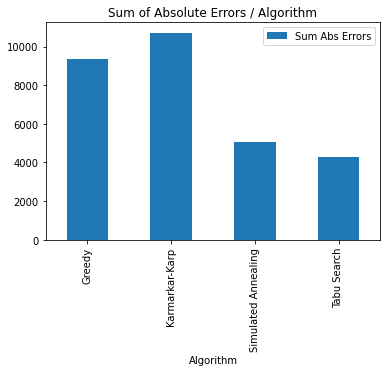

In [35]:
df[["Algorithm", "Sum Abs Errors"]].set_index("Algorithm").plot.bar(title='Sum of Absolute Errors / Algorithm');